# Metropolis Hastings

## Part A: MH Proposals and Acceptance Probabilities

> *Starting with a very general notation...*

Accepting draws from a ***proposal distribution*** 

$\tilde x^{(t)} \sim q(\tilde x^{(t)}|x^{(t-1)})$

according to a "coin flip"

$x^{(t)} = \left\{\begin{array}{ll}
\tilde x^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right) \quad \color{gray}{\begin{array}{c}\textrm{... is the normalizing constant needed for $p$?}\\\textrm{... and what happens if $q$ is symmetric?}  \end{array}}\\
x^{(t-1)} & \text{otherwise}
\end{array}\right.$

will produce draws from $p(x^{(t)})$.

### This is a two step conditional process<br>which altogether defines a <u>transition distribution</u>

$
\begin{align*}
&\quad\, \Pr(\textrm{accept}|\textrm{proposal},\textrm{current state}) q(\textrm{proposal}|\textrm{current state})\\ 
&={}
\Pr(\textrm{accept}|\textrm{proposal}) p(\textrm{proposal}|\textrm{current state})\\
&={} \Pr(x^{(t)} = \tilde x^{(t)}) q(\tilde x^{(t)}|x^{(t-1)}) = p(\tilde x^{(t)}|x^{(t-1)})
\end{align*}
$

so $q(\tilde x^{(t)}|x^{(t-1)})$ is our **proposal distribuiton** but $p(\tilde x^{(t)}|x^{(t-1)})$ is our actual **transition distribuiton**

### Does it work?

Let's see for 

$
\begin{align*}
p(x^{(t)}) & \rightarrow {} N(0,1)\\
q(\tilde x^{(t)}|x^{(t-1)}) & \rightarrow {} N(x^{(t-1)},\sigma)
\end{align*}
$


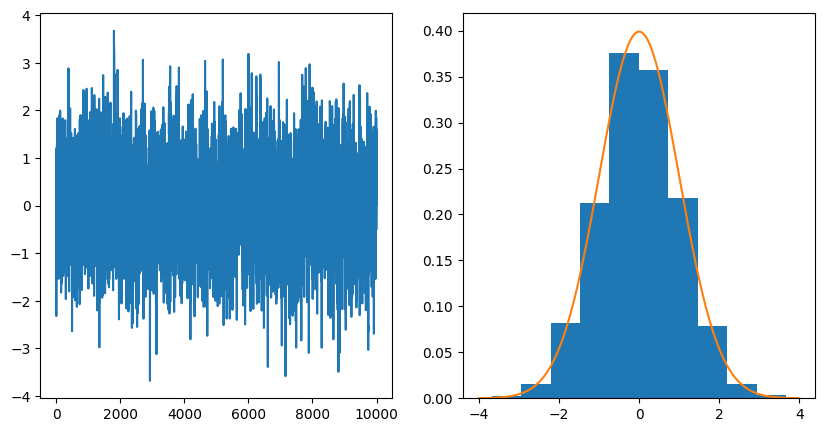

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

p_x_pdf = lambda x: stats.norm().pdf(x)
mh_tuning_parameter = 1.5
q_xt_given_xtm1 = lambda x: stats.norm(x, scale=mh_tuning_parameter)
proposal_distribution = q_xt_given_xtm1

m = 10000
x = np.zeros(m)
rejections = 0
for t in range(1,m):
    x_tilde = proposal_distribution(x[t-1]).rvs()
    acceptance_probability = min(1, p_x_pdf(x_tilde)/p_x_pdf(x[t-1]))
    if stats.uniform().rvs() < acceptance_probability:
        x[t] = x_tilde
    else:
        x[t] = x[t-1]
        rejections += 1

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x)
ax[1].hist(x, density=True)
x_support = np.linspace(-4,4,301)
ax[1].plot(x_support, p_x_pdf(x_support));

## Part B: What is MH?


### Why doesn't this work?


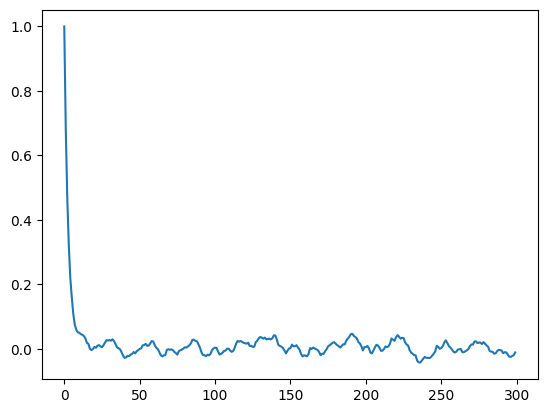

In [2]:
K = 300
autocorrelations = np.ones(K)
for t_plus_k in range(1, K):
    autocorrelations[t_plus_k] = np.corrcoef(x[:-t_plus_k], x[t_plus_k:])[0,1]
    
plt.plot(autocorrelations);

### Effective sample size

$$n_{\text{eff}} = \frac{m}{\sum_{k=-\infty}^\infty\rho_k} = \frac{m}{1+2\sum_{k=1}^\infty\rho_k} \quad \text{ for order $k$ autocorrelations } \quad \rho_k $$

which is based on the relative value of $m$ between
- $\textrm{Var}\left(\frac{1}{n}{\sum_{t=1}^n x^{(t)}}\right) = \frac{\sigma^2}{n}$ under i.i.d. sampling and the actual 
- $\begin{align}\textrm{Var}\left(\frac{1}{m}\sum_{t=1}^m x^{(t)}\right) &={} \frac{1}{m^2}\left(\sum_{t=1}^m \textrm{Var}\left(x^{(t)}\right) + \sum_{t \neq t'} \textrm{Cov}(x^{(t)},x^{(t')})\right)\\ &={} \frac{1}{m^2}\left(m \sigma^2 + \sum_{t \neq t'} \sigma^2 \rho_{t,t'}\right)\\ &\approx{} \frac{1}{m^2}\left(m \sigma^2+2m \sigma^2 \sum_{k=1}^m\rho_k\right) \approx \frac{\sigma^2}{m}\left(1+2  \sum_{k=1}^\infty\rho_k\right) \end{align}$
- Now call $n\rightarrow n_{\textrm{eff}}$ and solve for $n_{\textrm{eff}}$ in $\frac{\sigma^2}{n_{\textrm{eff}}} = \frac{\sigma^2}{m}\left(1+2  \sum_{k=1}^\infty\rho_k\right)$ which gives our result showing what our dependent samples would have counted for relative to an i.i.d. sample size count


In [ ]:
n_eff s2 = m s2 + 2ms2 Sum r
n_eff = m + 2m  Sum r

m*m/n_eff = m/(1+ 2  Sum r)

In [5]:
m / (1 + 2*autocorrelations[1:100].sum())

np.float64(1687.587970913228)

(np.int64(18), np.float64(1730.778654360895))

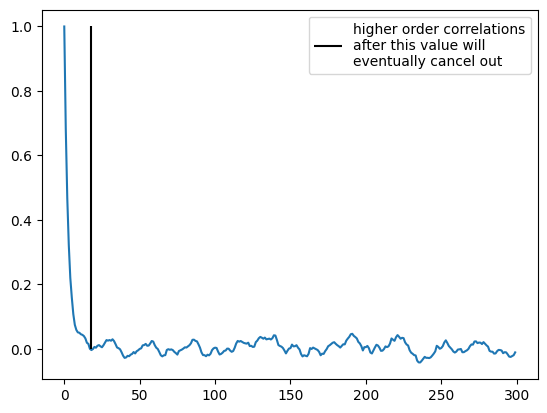

In [6]:
K = 300
autocorrelations = np.ones(K)
for t_plus_k in range(1, K):
    autocorrelations[t_plus_k] = np.corrcoef(x[:-t_plus_k], x[t_plus_k:])[0,1]

approximation_stop = (autocorrelations < 0).cumsum()
approximation_stop = approximation_stop*np.arange(K)
approximation_stop = min(approximation_stop[approximation_stop>0])

plt.plot(autocorrelations) 
plt.vlines(approximation_stop, ymin=0, ymax=1, color='k',
           label='higher order correlations\nafter this value will\neventually cancel out')
plt.legend()

# effective sample size
approximation_stop, m / (1 + 2*autocorrelations[1:approximation_stop].sum())

In [7]:
10000/14

714.2857142857143

### Rejection Rate

The **rejection rate** of the **Metropolis Hastings** algorithm given above is something else that we should keep in mind.

#### Q1: Is a high rejection rate benefiicial or detrimental for the effective sample size calculation?

#### Q2: What is the relationship between the proposal distribution and the rejection rate?

In [8]:
rejections/m

0.4104

### Why does this work?

> *Changing and hinting with the the notation to begin being suggestive about our purposes...*

If we have a **stationary distribution** $p(\theta \color{gray}{|x})$ then **transition distribution (kernel)** $p$ (not to be confused with the **Metropolis-Hastings prposal distribution** $q$!) produces a sample from this **stationary distribution** if the ***Markov chain*** it produces is ***reversible***, meaning that

$\require{cancel}
\begin{align*}
p(\theta^{(t)}|\theta^{(t-1)})p(\theta^{(t-1)}\color{gray}{|x}) & = {}  p(\theta^{(t-1)}|\theta^{(t)})p(\theta^{(t)}\color{gray}{|x})\\\\
& \textrm{But is this true if we use a Metropolis-Hastings transition distribution (kernel)?}
\\\\
p(\theta^{(t)}\color{gray}{|x}) & \overset{MH}{=} {} \frac{\alpha_{\textrm{accept prob}}^{\textrm{forward}} q(  \theta^{(t)}| \theta^{(t-1)})}{\alpha_{\textrm{accept prob}}^{\textrm{backward}} q(  \theta^{(t-1)}|\theta^{(t)})}p(\theta^{(t-1)}\color{gray}{|x})\\
p( \theta^{(t)}\color{gray}{|x}) & = {} \frac{\min\left(1,\frac{p( \theta^{(t)}\color{gray}{|x})}{p(\theta^{(t-1)}\color{gray}{|x})}\frac{q(\theta^{(t-1)}| \theta^{(t)})}{q( \theta^{(t)}|\theta^{(t-1)})}\right) q( \theta^{(t)}|\theta^{(t-1)})}{\min\left(1,\frac{p( \theta^{(t-1)}\color{gray}{|x})}{p( \theta^{(t)}\color{gray}{|x})}\frac{q( \theta^{(t)}| \theta^{(t-1)})}{q( \theta^{(t-1)}| \theta^{(t)})}\right) q(  \theta^{(t-1)}|\theta^{(t)})}p(\theta^{(t-1)}\color{gray}{|x})\\\\
& \textrm{The fractions in the "$\min$" in the numerator or denomenator are reciprocals}\\
& \textrm{thus regardless of if the numerator fraction is equal to, greater than, or less than $1$}\\\\
p( \theta^{(t)}\color{gray}{|x}) & = {} \frac{p( \theta^{(t)}\color{gray}{|x})}{p(\theta^{(t-1)}\color{gray}{|x})}\frac{q(\theta^{(t-1)}| \theta^{(t)})}{q( \theta^{(t)}|\theta^{(t-1)})} \frac{q\theta^{(t)}|\theta^{(t-1)})}{q(\theta^{(t-1)}|\theta^{(t)})}p(\theta^{(t-1)}\color{gray}{|x}) \\\\
\xcancel{p( \theta^{(t)}\color{gray}{|x})} & = {} \frac{\xcancel{p(\theta^{(t)}\color{gray}{|x})}}{\xcancel{p(\theta^{(t-1)}\color{gray}{|x})}}\frac{\cancel{q(\theta^{(t-1)}| \theta^{(t)})}}{\cancel{q( \theta^{(t)}|\theta^{(t-1)})}} \frac{\cancel{q\theta^{(t)}|\theta^{(t-1)})}}{\cancel{q(\theta^{(t-1)}|\theta^{(t)})}}\xcancel{p(\theta^{(t-1)}\color{gray}{|x})}\\  \longrightarrow \quad 1 & ={} 1 \quad \textrm{ so the equation is true and reversibility holds}
\end{align*}$

This illustrates how the entire design and purpose of the **Metropolis-Hastings** algorithm specification (which seemingly appeared magically out of thin air) is in fact based on "reverse engineering" (if you will please excuse the pun) exactly what is needed to create a **reversible Markov Chain** (whose **stationary distribution** is the **target** of the **Metropolis-Hastings** algorithm).

## Part C: Back to Gibbs sampling

**Gibbs sampling** also creates a **reversible Markov Chain** whereby the samples, forwards or backwards, are from the same **stationary distribution** (which is the **joint posterior distribution** of the (random variable) parameters of the **full conditional (posterior) distributions**


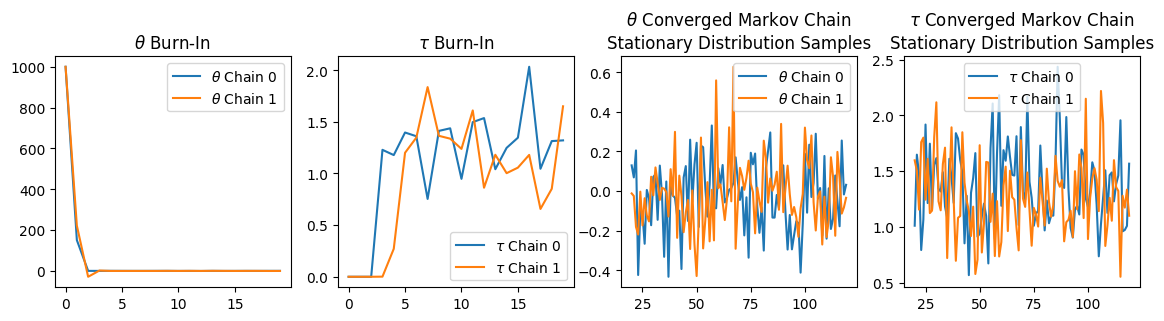

In [9]:
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = \
        stats.gamma(a=n/2+1, 
                    scale=2/((x-theta[c,g-1])**2).sum()).rvs()
        theta[c,g] = \
        stats.norm(x.mean(), 
                   scale=1/np.sqrt(tau[c,g]*n)).rvs()

fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();         

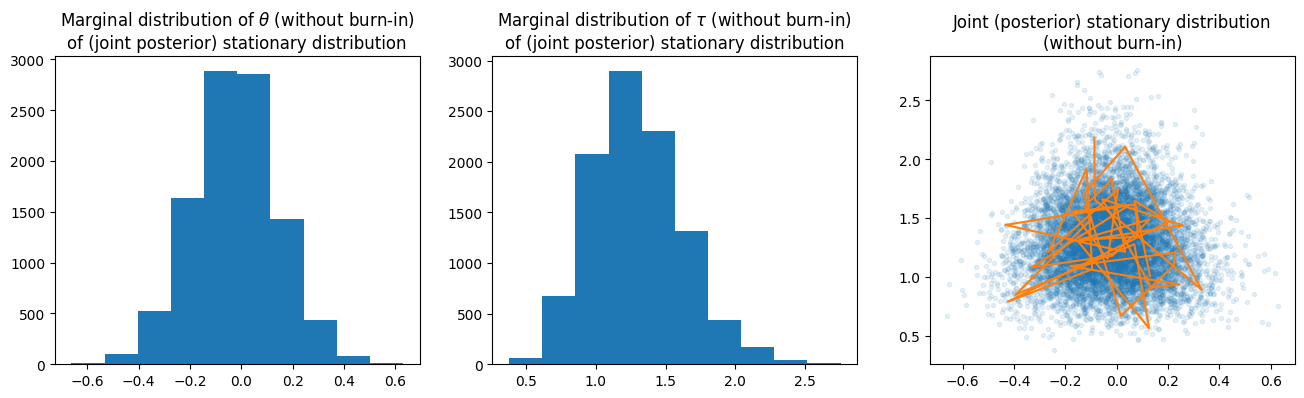

In [10]:
fig,ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].set_title("Marginal distribution of $\\theta$ (without burn-in)\nof (joint posterior) stationary distribution")
ax[1].set_title("Marginal distribution of $\\tau$ (without burn-in)\nof (joint posterior) stationary distribution")
ax[2].set_title("Joint (posterior) stationary distribution\n(without burn-in)")

ax[0].hist(theta[0,burn:])
ax[1].hist(tau[0,burn:])
ax[2].plot(theta[0,burn:], tau[0,burn:], '.', alpha=0.1);
demo = 3*burn
ax[2].plot(theta[0,burn:demo], tau[0,burn:demo]);

## Metropolis within Gibbs

1. All **full conditional distributions** are proportional to the **joint**.
2. A **Metropolis-Hastings** step can sample from a **full conditional** by proposing a sample and accepting it according to the MH acceptance probability.
3. The target density in the MH acceptance probability appears in the numerator and denomenator so it's normalizing constants cancel and all that's needed 

Accepting draws from a ***proposal distribution*** 

$\tilde \theta^{(t)} \sim q(\tilde \theta^{(t)}|\theta^{(t-1)})$

according to 

$\require{cancel}
\theta^{(t)} = \left\{\begin{array}{ll}
\tilde \theta^{(t)} & \text{with probability } \min\bigg(1,\frac{p(\tilde \theta^{(t)}|\tau^{(t)},\mathbf{x})}{p(\theta^{(t-1)}|\tau^{(t)},\mathbf{x})}\overset{\textrm{if symmetric}}{\cancel{\frac{q(\theta^{(t-1)}|\tilde \theta^{(t)})}{q(\tilde \theta^{(t)}|\theta^{(t-1)})}}^1}\bigg) \\
\theta^{(t-1)} & \text{otherwise}\\\\
\end{array}\right.$

will produce draws from $p(\theta^{(t)}|\tau^{(t)},\mathbf{x})$.

If we don't know the **full conditional distributions** *analytically* we can't use the *simple version* of **Gibbs sampling**. *But we do know the full conditional distributions proportionally up to their normalizing constants* and the unknown normalizing constants cancel in the target density ratios

$\frac{p(\tilde \theta^{(t)}|\tau^{(t)},\mathbf{x})}{p(\theta^{(t-1)}|\tau^{(t)},\mathbf{x})} = \frac{p(\tilde \theta^{(t)},\tau^{(t)},\mathbf{x})}{p(\theta^{(t-1)},\tau^{(t)},\mathbf{x})} = \frac{p(\mathbf{x}|\tilde \theta^{(t)},\tau^{(t)})p(\tilde \theta^{(t)})}{p(\mathbf{x}|\theta^{(t-1)},\tau^{(t)})p(\theta^{(t-1)})}$

so all we need is the **joint distribuiton** (as a function of the parameter of the **full conditional**, here $\theta$).

And an analogous **Metropolis within Gibbs** step exists for $\tau^{(t)}$. 


In [ ]:
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):

        # the likelihood*prior as a function of tau
        # is proportional to the full conditional of tau
        # all of which are proportion to the joint as a function of tau
        tau_target = lambda tau_: np.prod(stats.norm(loc=theta[c,g-1],
                                                     scale=1/(tau_)**0.5).pdf(x))*\
                                  stats.expon(scale=1).pdf(tau_) 
                                  # arbitrarily chosen tau prior
        # arbitrarily chosen MH prosal distribution for tau
        tau_propsal = stats.expon(scale=2)
        tau_tilde = tau_propsal.rvs()

        mh_calc = (tau_target(tau_tilde)/tau_target(tau[c,g-1]))*\
        (tau_propsal.pdf(tau[c,g-1])/tau_propsal.pdf(tau_tilde))
        acceptance_probability = min(1, mh_calc)
        if stats.uniform().rvs() < acceptance_probability:
            tau[c,g] = tau_tilde
        else:
            tau[c,g] = tau[c,g-1]
        
        theta[c,g] = joint * prior_theta


## Homework

---

### Q1

Convert your **Gibbs sampler** from the previous homework to be a **Metropolis within Gibbs** sampler. 
- Do not derive any full conditionals and instead just use the joint distribution which is the product of the likelihood with the priors 
    - Note that in fact you must only be proportional to the joint since irrelevant priors of "the other parameter" will cancel in the ratio
- Note that $\tau$ must be positive so proposals $\tilde \tau$ must also be positive. The easiest way to achieve this would be to use independent samples (that do not depend on $\tau^{(t-1)}$ from exponential, half normal, gamma, or inverse gamma distributions (and other distributions defining strictly positive random variables).
- When considering using independent proposal distributions one option of some note is to use the prior $p(\tau)$ as this proposal distribution

*Clearly articulate your specification and provide a demonstration showing the Bayesian inference it provides, in contrast to that of your previous Gibbs sampler (of Q2 from the last homework).*

### Q2

Adjust your **Metropolis within Gibbs** sampler as follows.

- Use the following **dependent** proposal for $\tau$

```Python
stats.truncnorm(a=-tau_t_minus_1/s, b=np.inf,
                loc=tau_t_minus_1, scale=s)
```

- Use a prior for $\theta$ that is not a normal distribution 


*Provide a demonstration showing the Bayesian inference provided by this sampler. Then discuss the necessity (or lackthereof) of analytically determining the full conditional distributions when performing Gibbs sampling.*

### Q3 

For **Metropolis Hastings** targetting (**stationary distribution**) $p$ based on proposal distribuiton $q$ given below

$\begin{align}
q(\tilde x^{(t)} | x^{(t-1)}) &={} \left(\frac{1}{2}\right)^{1-{\tilde x^{(t)}}}\left(\frac{1}{2}\right)^{\tilde x^{(t)}} \quad \color{gray}{\textrm{ ... does } \quad \frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})} \quad  \textrm{ cancel?}}\\
\textrm{and} \quad p(x^{(t)}) &={} \left(\frac{1}{3}\right)^{1-{x^{(t)}}}\left(\frac{2}{3}\right)^{x^{(t)}}\\
\end{align}$

<u>show that</u> the **transition kernel** $K$ of transition probabilities is defined the **Metropolis Hastings** algorithm is

$K = \left[\begin{array}{cc}\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=0) & \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=0)\\\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=1)& \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=1)\end{array}\right] = \left[\begin{array}{cl} 0.5 & 0.25 \\ 0.5 & 0.75 \end{array}\right]$

> For example 
>
> $\begin{align}
\Pr(s_1 \rightarrow s_1) &={}
q(\tilde x^{(t)}=1 | x^{(t-1)}=1) + q(\tilde x^{(t)}=0 | x^{(t-1)}=1) \left(1- \frac{p(\tilde x^{(t)}=0)}{p(x^{(t-1)}=1)}\right)\\
&={} 1/2 + (1/2)(1-(1/3)/(2/3)) = 0.75
\end{align}$



This **transition kernel** $K$ means that

- if we're currently a $0$ there's a 50\% chance that we'll stay a $0$ and 50\% chance that we'll change to a $1$
- and if we're currently a $1$ there's a 75\% chance that we'll stay a $1$ and 25\% chance that we'll change to a $0$

which specifies [geometric distributions](https://en.wikipedia.org/wiki/Geometric_distribution) with, respectively, expected values of $1$ and $3$ "failures before transitioning to the other state" which means that on average a "$0$ state" will be a run of two $0$'s while a "$1$ state" will be a run of four $1$'s which leads to the desired one-to-two (or one-thirds to two-thirds) ratio of $0$'s and $1$ is the Markov Chain. 


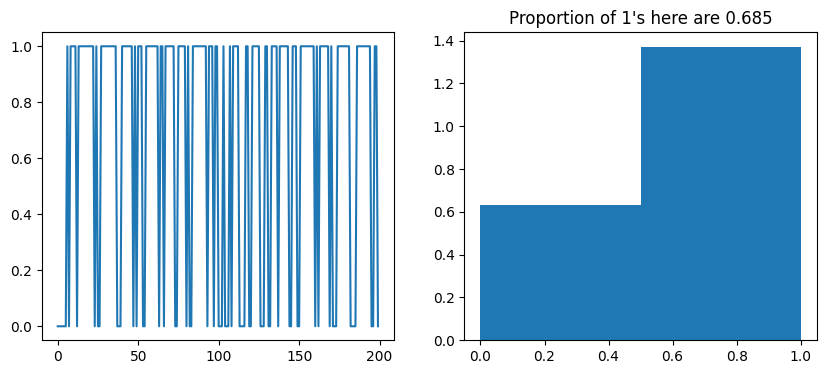

In [14]:
# Here's what it looks like if we flip coins  
# with transition probabilties defind by A sequentially
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
K = np.array([[.5,.25],[.5,.75]]) 
T = 200
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < K[:,s_t[t-1]][1])
    
fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(s_t)
ax[1].hist(s_t, bins=2, density=True)
ax[1].set_title("Proportion of 1's here are "+str(s_t.mean()));

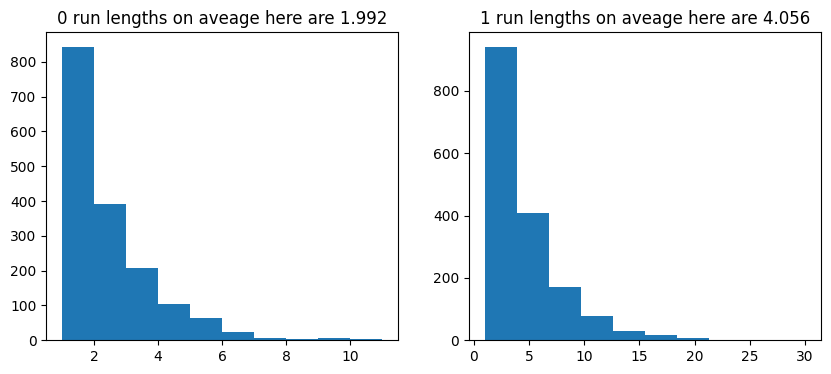

In [15]:
# Here's what it looks like if we flip coins  
# with transition probabilties defind by K 
# and sure enough we recover 1/3 and 2/3 for 0 and 1 respectively
T = 10000
s_t = np.zeros(T, dtype=int)
for t in range(1, T):
    s_t[t] = int(stats.uniform().rvs() < K[:,s_t[t-1]][1])
    
state0_run_length = []
state1_run_length = []
run_length = 1
for t in range(1,T):
    if s_t[t]==s_t[t-1]:
        run_length += 1
    else:
        if s_t[t-1] == 0:
            state0_run_length += [run_length]
        else:
            state1_run_length += [run_length]        
        run_length = 1
        
fig,ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(state0_run_length)
ax[0].set_title("0 run lengths on aveage here are "+str(np.mean(state0_run_length).round(3)))
ax[1].hist(state1_run_length)
ax[1].set_title("1 run lengths on aveage here are "+str(np.mean(state1_run_length).round(3)));


## Answers

---

### Q1:

We shall adjust the previous Gibbs sampler so that it is a Metropolis within Gibbs sampler instead.

First, we start with the following imports and helper functions:

In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [17]:
# Helper function to compute the joint posterior of the two parameter priors.
def joint_posterior(x: np.array, theta0: float, tau0: float, theta1: float, tau1: float, alpha: float, lamba_: float) -> float:
    prior_theta = stats.norm(theta0, 1.0 / np.sqrt(tau0)).pdf(theta1)
    prior_tau = stats.gamma(alpha, scale=(1.0 / lambda_)).pdf(tau1)

    likelihood = np.prod(stats.norm(theta1, 1.0 / np.sqrt(tau1)).pdf(x))
    
    return likelihood * prior_theta * prior_tau

Now, we can proceed with the sampler implementation:

In [25]:
# Distribution and data parameters.
n, m, s = 30, 1, np.sqrt(2)

# Generating data.
x = stats.norm(loc=m, scale=s).rvs(size=n)

# Initializing prior parameters.
theta0, tau0 = 0, 1
alpha, lambda_ = 2, 2

# Initializing Metropolis within Gibbs sampler parameters.
C, G = 2, 10000

theta, tau = np.zeros([C, G]), np.zeros([C, G])
theta[:, 0], tau[:, 0] = 1000, 1

# Perform the Metropolis within Gibbs sampling.
for c in range(C):
    for g in range(1, G):
        
        # Update the theta parameter.
        theta_prop = stats.norm(theta[c, g - 1], 0.5).rvs()
        
        numerator_theta = joint_posterior(x, theta0, tau0, theta_prop, tau[c, g - 1], alpha, lambda_)
        denominator_theta = joint_posterior(x, theta0, tau0, theta[c, g - 1], tau[c, g - 1], alpha, lambda_)
        
        if np.random.random() < min(1.0, (numerator_theta / denominator_theta)):
            theta[c, g] = theta_prop
        else:
            theta[c, g] = theta[c, g - 1]
        
        # Update the tau parameter.
        tau_prop = stats.expon(scale=(1.0 / tau[c, g - 1])).rvs()
        
        numerator_tau = joint_posterior(x, theta0, tau0, theta[c, g], tau_prop, alpha, lambda_)
        denominator_tau = joint_posterior(x, theta0, tau0, theta[c, g], tau[c, g - 1], alpha, lambda_)
        
        if np.random.random() < min(1.0, ((numerator_tau / denominator_tau) * (tau_prop / tau[c, g - 1]))):
            tau[c, g] = tau_prop
        else:
            tau[c, g] = tau[c, g - 1]

/var/folders/ds/xn0vpv0j62332bc822w83n440000gn/T/ipykernel_66093/3797861062.py:27: RuntimeWarning: invalid value encountered in scalar divide
  if np.random.random() < min(1.0, (numerator_theta / denominator_theta)):
/var/folders/ds/xn0vpv0j62332bc822w83n440000gn/T/ipykernel_66093/3797861062.py:38: RuntimeWarning: invalid value encountered in scalar divide
  if np.random.random() < min(1.0, ((numerator_tau / denominator_tau) * (tau_prop / tau[c, g - 1]))):


Finally, we can plot the results:

/var/folders/ds/xn0vpv0j62332bc822w83n440000gn/T/ipykernel_66093/4252037369.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i, j].legend()


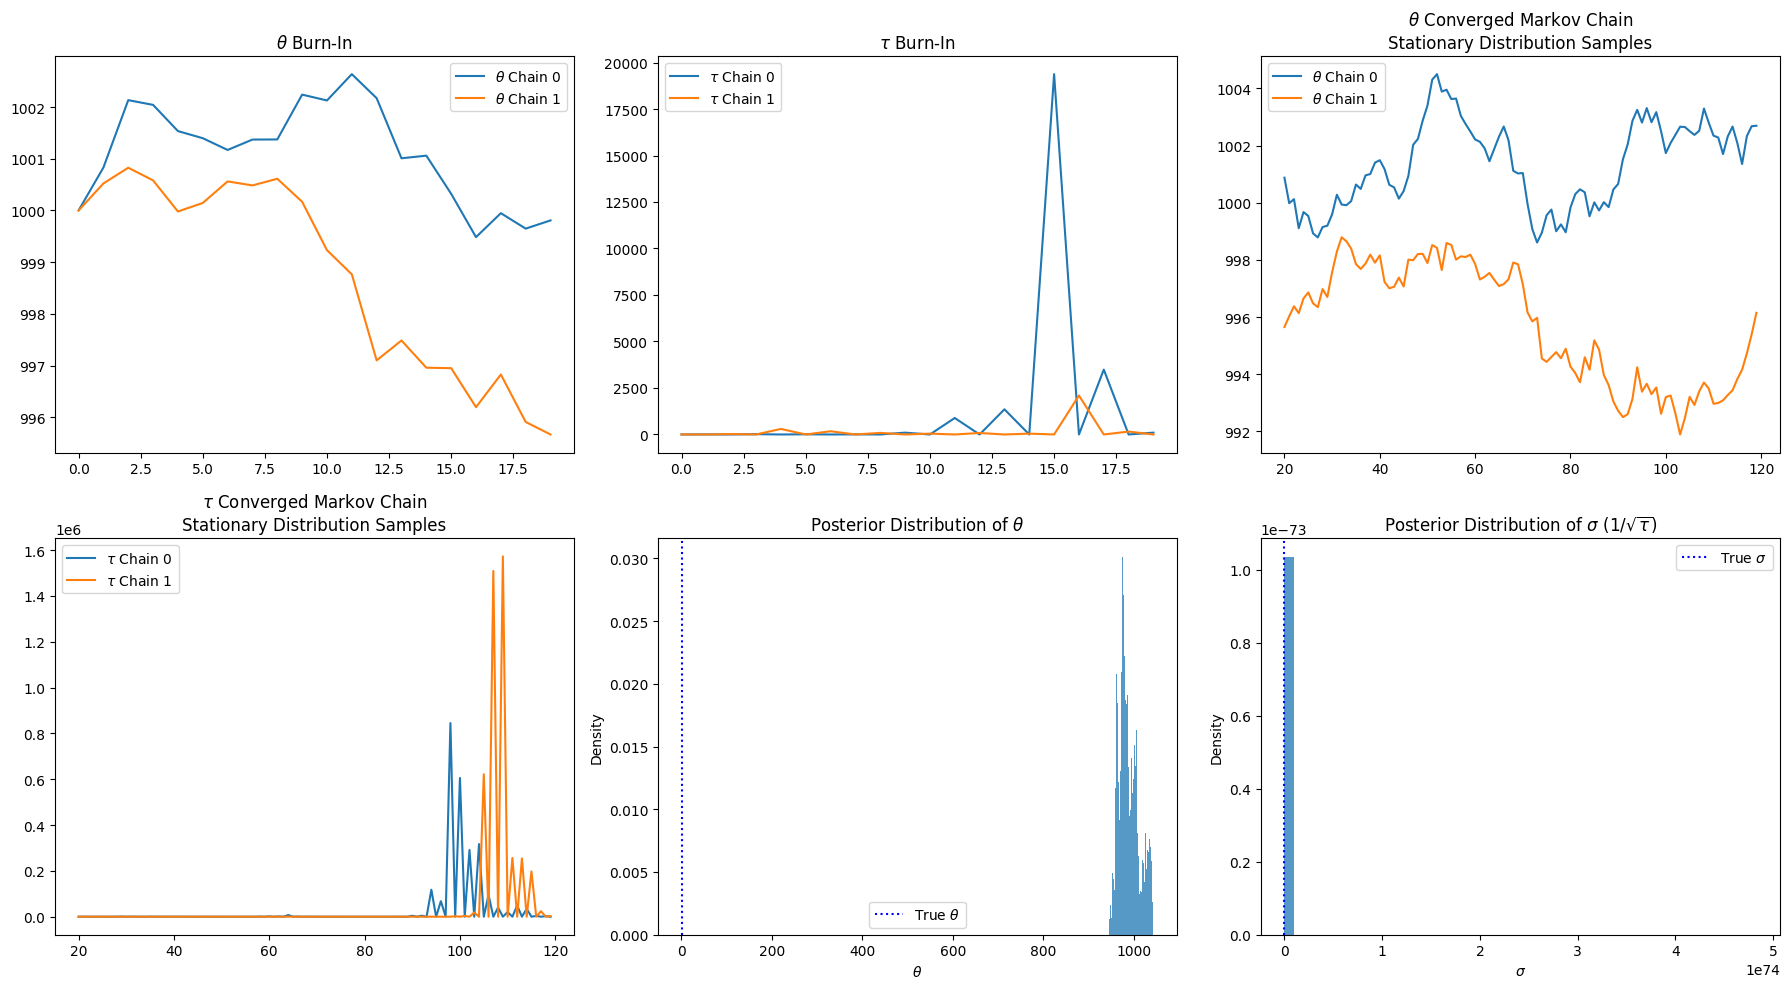

True θ (mean): 1, Estimated θ: 988.8148, (95% CI: [954.5446, 1036.3128])
True σ (standard deviation): 1.4142135623730951, Estimated σ: 113861330016501415356051970727212415094816058161313926776231795223429120.0000, (95% CI: [0.0000, 1570702056740940916188802634850040059786096663405477190957606532808704.0000])


In [26]:
# Creating various plots.
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

ax[0, 0].set_title("$\\theta$ Burn-In")
ax[0, 1].set_title("$\\tau$ Burn-In")
ax[0, 2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[1, 0].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
ax[1, 1].set_title("Posterior Distribution of $\\theta$")
ax[1, 2].set_title("Posterior Distribution of $\\sigma$ (1/$\\sqrt{\\tau}$)")

burn = 20 
demo = 120

for c in range(C):
    ax[0, 0].plot(theta[c, :burn], label="$\\theta$ Chain "+str(c))
    ax[0, 1].plot(tau[c, :burn], label="$\\tau$ Chain "+str(c))
    ax[0, 2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label="$\\theta$ Chain "+str(c))
    ax[1, 0].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label="$\\tau$ Chain "+str(c))

for i in range(2):
    for j in range(3):
        ax[i, j].legend()

# Performing Bayesian inference.
burn_in = 1000

theta_samples = theta[:, burn_in:].flatten()
tau_samples = tau[:, burn_in:].flatten()
sigma_samples = 1.0 / np.sqrt(tau_samples)

# Plotting the posterior distribution of theta.
ax[1, 1].hist(theta_samples, bins=50, density=True, alpha=0.75)

ax[1, 1].axvline(m, color='b', linestyle=':', label='True $\\theta$')

ax[1, 1].set_xlabel('$\\theta$')
ax[1, 1].set_ylabel('Density')

ax[1, 1].legend()

# Plotting the posterior distribution of sigma.
ax[1, 2].hist(sigma_samples, bins=50, density=True, alpha=0.75)

ax[1, 2].axvline(s, color='b', linestyle=':', label='True $\\sigma$')

ax[1, 2].set_xlabel('$\\sigma$')
ax[1, 2].set_ylabel('Density')

ax[1, 2].legend()

plt.tight_layout()
plt.show()

# Printing results and credible intervals.
print(f"True θ (mean): {m}, Estimated θ: {np.mean(theta_samples):.4f}, (95% CI: [{np.percentile(theta_samples, 2.5):.4f}, {np.percentile(theta_samples, 97.5):.4f}])")
print(f"True σ (standard deviation): {s}, Estimated σ: {np.mean(sigma_samples):.4f}, (95% CI: [{np.percentile(sigma_samples, 2.5):.4f}, {np.percentile(sigma_samples, 97.5):.4f}])")

When comparing this version to the previous Gibbs sampler, it can be seen that the estimates vary drastically, likely because of a failure to converge. The confidence intervals for both $\theta$ and $\tau$ exploded, while the original Gibbs sampler had estimates of $\theta$: 1.2325, (95% CI: [0.6798, 1.7925]) and $\sigma$: 1.5207, (95% CI: [1.1815, 1.9966]).

### Q2:

We shall adjust the Metropolis within Gibbs sampler by using

```Python 
stats.truncnorm(a=-(tau_t_minus_1 / s), b=np.inf, loc=tau_t_minus_1, scale=s)
``` 

as a proposal distribution for $\tau$.

Additionally, a different non-normal prior for $\theta$ will be chosen. As an example, we will use the logistic distribution for its similarity to the normal distribution. The logistic distribution is given by:

$$f(x | \mu, \sigma) = \frac{e^{-(x-\mu)/\sigma}}{\sigma(1+e^{-(x-\mu)/\sigma})^2}$$

First, we begin by adjusting the helper function that computes the likelihood:

In [20]:
# Adjusted helper function to compute the joint posterior of the two parameter priors.
# Here, the theta prior has been replaced from a Normal distribution to a Logistic distribution.
def joint_posterior(x: np.array, theta0: float, tau0: float, theta1: float, tau1: float, alpha: float, lambda_: float) -> float:
    prior_theta = stats.logistic(loc=theta0, scale=tau0).pdf(theta1)
    prior_tau = stats.gamma(alpha, scale=(1.0 / lambda_)).pdf(tau1)
    
    likelihood = np.prod(stats.norm(theta1, 1.0 / np.sqrt(tau1)).pdf(x))
    
    return likelihood * prior_theta * prior_tau

Now that the joint posterior has been properly modified, we can continue with the sampler implementation:

In [21]:
# Distribution and data parameters.
n, m, s = 30, 1, np.sqrt(2)

# Generating data.
x = stats.norm(loc=m, scale=s).rvs(size=n)

# Initializing prior parameters.
theta0, tau0 = 0, 1
alpha, lambda_ = 2, 2

# Initializing proposal scale parameter for tau.
s = 0.5

# Initializing Metropolis within Gibbs sampler parameters.
C, G = 2, 10000

theta, tau = np.zeros([C, G]), np.zeros([C, G])
theta[:, 0], tau[:, 0] = 1000, 1

# Perform the Metropolis within Gibbs sampling.
for c in range(C):
    for g in range(1, G):
        
        # Update the theta parameter.
        theta_prop = stats.norm(theta[c, g - 1], 0.5).rvs()
        
        numerator_theta = joint_posterior(x, theta0, tau0, theta_prop, tau[c, g - 1], alpha, lambda_)
        denominator_theta = joint_posterior(x, theta0, tau0, theta[c, g - 1], tau[c, g - 1], alpha, lambda_)

        # Determine whether to accept or reject the sample based on the theta posterior ratio.
        if np.random.random() < min(1.0, (numerator_theta / denominator_theta)):
            theta[c, g] = theta_prop
        else:
            theta[c, g] = theta[c, g - 1]
        
        # Update the tau parameter using the truncated Normal distribution instead.
        tau_prop = stats.truncnorm(a=-(tau[c, g - 1] / s), b=np.inf, loc=tau[c, g - 1], scale=s).rvs()

        numerator_tau = joint_posterior(x, theta0, tau0, theta[c, g], tau_prop, alpha, lambda_)
        denominator_tau = joint_posterior(x, theta0, tau0, theta[c, g], tau[c, g - 1], alpha, lambda_)
        
        # Calculate proposal densities.
        q_forward = stats.truncnorm(a=-(tau[c, g - 1] / s), b=np.inf, loc=tau[c, g - 1], scale=s).pdf(tau_prop)
        q_backward = stats.truncnorm(a=-(tau_prop / s), b=np.inf, loc=tau_prop, scale=s).pdf(tau[c, g - 1])

        # Determine whether to accept or reject the sample based on the corrected tau posterior ratio.
        if np.random.random() < min(1.0, (numerator_tau / denominator_tau) * (q_backward / q_forward)):
            tau[c, g] = tau_prop
        else:
            tau[c, g] = tau[c, g - 1]

/var/folders/ds/xn0vpv0j62332bc822w83n440000gn/T/ipykernel_66093/3287783355.py:31: RuntimeWarning: invalid value encountered in scalar divide
  if np.random.random() < min(1.0, (numerator_theta / denominator_theta)):
/var/folders/ds/xn0vpv0j62332bc822w83n440000gn/T/ipykernel_66093/3287783355.py:47: RuntimeWarning: invalid value encountered in scalar divide
  if np.random.random() < min(1.0, (numerator_tau / denominator_tau) * (q_backward / q_forward)):


Finally, we plot the results and inference again:

/var/folders/ds/xn0vpv0j62332bc822w83n440000gn/T/ipykernel_66093/4252037369.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i, j].legend()


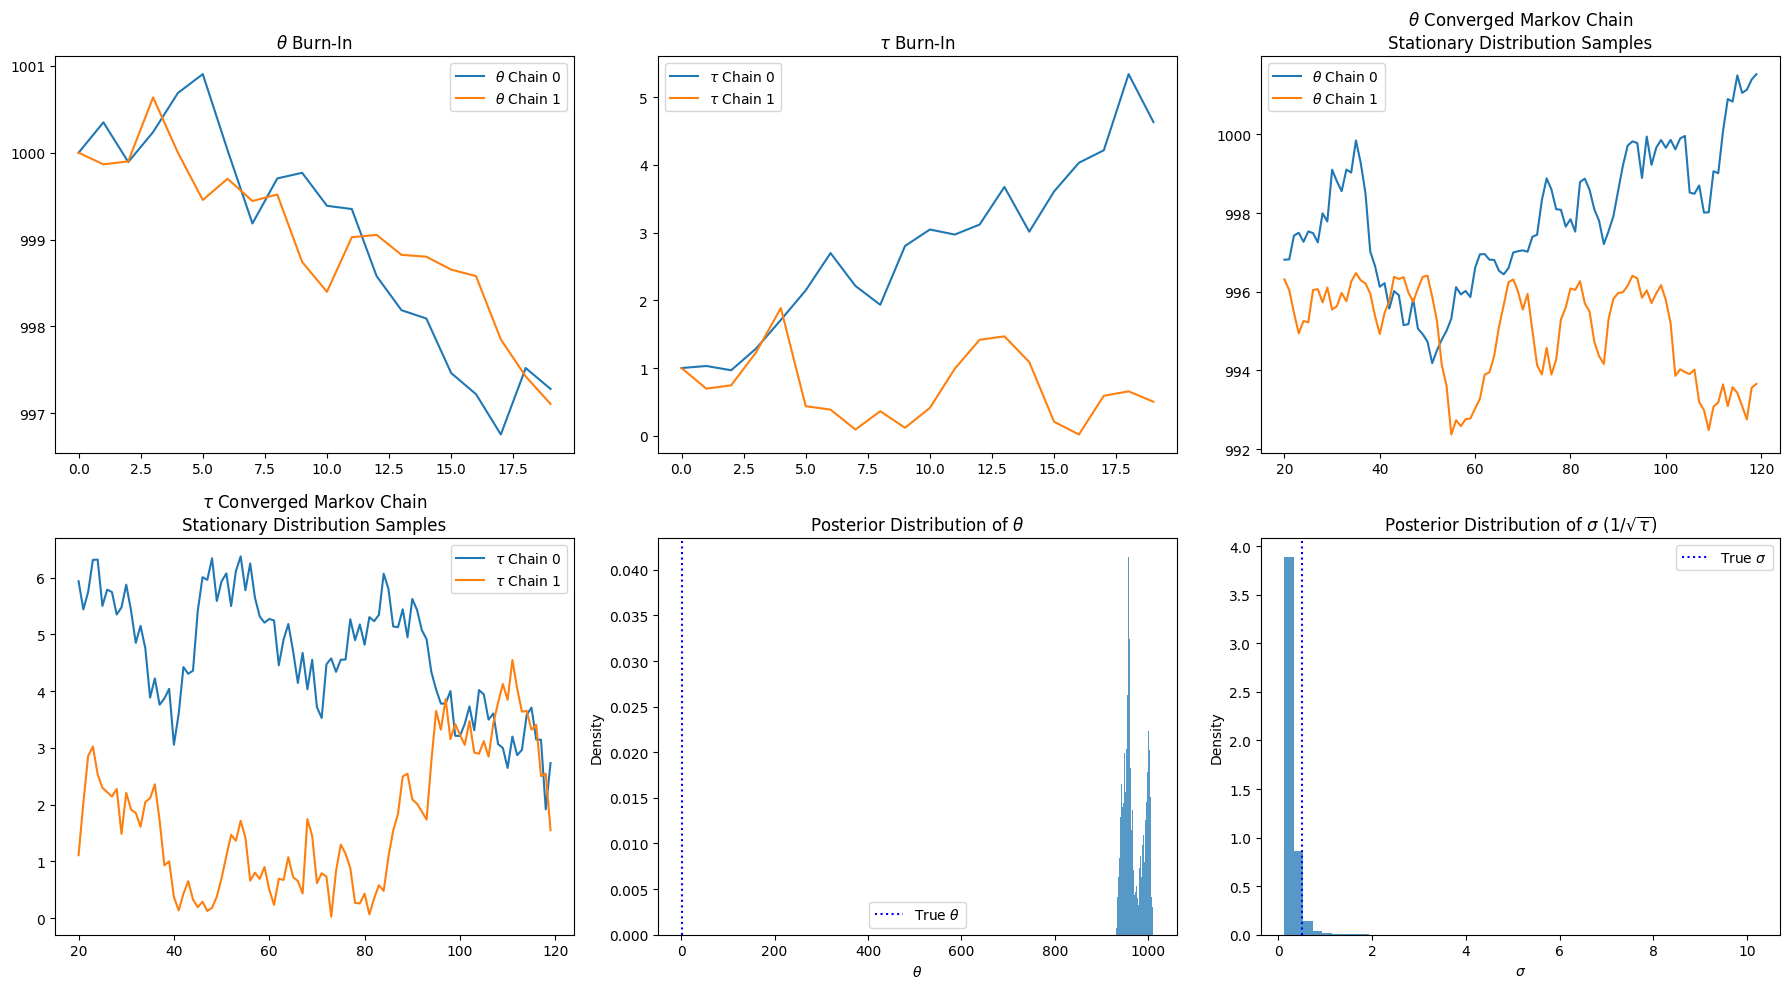

True θ (mean): 1, Estimated θ: 968.6434, (95% CI: [937.4893, 1004.3703])
True σ (standard deviation): 0.5, Estimated σ: 0.2927, (95% CI: [0.1483, 0.6509])


In [22]:
# Creating various plots.
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

ax[0, 0].set_title("$\\theta$ Burn-In")
ax[0, 1].set_title("$\\tau$ Burn-In")
ax[0, 2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[1, 0].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
ax[1, 1].set_title("Posterior Distribution of $\\theta$")
ax[1, 2].set_title("Posterior Distribution of $\\sigma$ (1/$\\sqrt{\\tau}$)")

burn = 20 
demo = 120

for c in range(C):
    ax[0, 0].plot(theta[c, :burn], label="$\\theta$ Chain "+str(c))
    ax[0, 1].plot(tau[c, :burn], label="$\\tau$ Chain "+str(c))
    ax[0, 2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label="$\\theta$ Chain "+str(c))
    ax[1, 0].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label="$\\tau$ Chain "+str(c))

for i in range(2):
    for j in range(3):
        ax[i, j].legend()

# Performing Bayesian inference.
burn_in = 1000

theta_samples = theta[:, burn_in:].flatten()
tau_samples = tau[:, burn_in:].flatten()
sigma_samples = 1.0 / np.sqrt(tau_samples)

# Plotting the posterior distribution of theta.
ax[1, 1].hist(theta_samples, bins=50, density=True, alpha=0.75)

ax[1, 1].axvline(m, color='b', linestyle=':', label='True $\\theta$')

ax[1, 1].set_xlabel('$\\theta$')
ax[1, 1].set_ylabel('Density')

ax[1, 1].legend()

# Plotting the posterior distribution of sigma.
ax[1, 2].hist(sigma_samples, bins=50, density=True, alpha=0.75)

ax[1, 2].axvline(s, color='b', linestyle=':', label='True $\\sigma$')

ax[1, 2].set_xlabel('$\\sigma$')
ax[1, 2].set_ylabel('Density')

ax[1, 2].legend()

plt.tight_layout()
plt.show()

# Printing results and credible intervals.
print(f"True θ (mean): {m}, Estimated θ: {np.mean(theta_samples):.4f}, (95% CI: [{np.percentile(theta_samples, 2.5):.4f}, {np.percentile(theta_samples, 97.5):.4f}])")
print(f"True σ (standard deviation): {s}, Estimated σ: {np.mean(sigma_samples):.4f}, (95% CI: [{np.percentile(sigma_samples, 2.5):.4f}, {np.percentile(sigma_samples, 97.5):.4f}])")

Indeed, we notice that at no point do we need to actually determine the full conditional distribution while Gibbs sampling. 

Most obviously, we use predefined proposal distributions to sample values for both $\theta$ and $\tau$ parameters instead of conditionals. Additionally, the ```joint_posterior``` computes an unnormalized, though proprotional, posterior probability via the use of only likelihoods and priors; whether this sample is accepted is also solely determined by the computed joint posteriors, albeit with the addition of sampling from a uniform distribution (which is trivial). 

Clearly, at no point are the full conditional distributions required.

### Q3:

Given the proposal distribution $q$ and target distribution $p$, we must show that the Metropolis-Hastings transition kernel $K$ is:

$$ K = \left[\begin{array}{cc} 0.5 & 0.25 \\ 0.5 & 0.75 \end{array}\right] $$

Hence, we must proceed by calculating each element of the matrix independantly:

$\Pr(x^{(t)} = 0 \rightarrow x^{(t+1)}=0)$:

$$
\begin{align*}
\Pr(0 \rightarrow 0) &= q(\tilde x^{(t)}=0 | x^{(t-1)}=0) + q(\tilde x^{(t)}=1 | x^{(t-1)}=0)(1 - \min(1, \frac{p(1)q(0|1)}{p(0)q(1|0)})) \\
&= \frac{1}{2} + \frac{1}{2}(1 - \min(1, \frac{(2/3)(1/2)}{(1/3)(1/2)})) \\
&= \frac{1}{2} + \frac{1}{2}(1 - 1) = 0.5
\end{align*}
$$

$\Pr(x^{(t)} = 1 \rightarrow x^{(t+1)}=0)$:

$$
\begin{align*}
\Pr(1 \rightarrow 0) &= q(\tilde x^{(t)}=0 | x^{(t-1)}=1) \min(1, \frac{p(0)q(1|0)}{p(1)q(0|1)}) \\
&= \frac{1}{2} \min(1, \frac{(1/3)(1/2)}{(2/3)(1/2)}) \\
&= \frac{1}{2} \cdot \frac{1}{2} = 0.25
\end{align*}
$$

$\Pr(x^{(t)} = 0 \rightarrow x^{(t+1)}=1)$:

$$
\begin{align*}
\Pr(0 \rightarrow 1) &= q(\tilde x^{(t)}=1 | x^{(t-1)}=0) \min(1, \frac{p(1)q(0|1)}{p(0)q(1|0)}) \\
&= \frac{1}{2} \min(1, \frac{(2/3)(1/2)}{(1/3)(1/2)}) \\
&= \frac{1}{2} \cdot 1 = 0.5
\end{align*}
$$

$\Pr(x^{(t)} = 1 \rightarrow x^{(t+1)}=1)$ was alreay given.

Therefore, it is the case that $K = \left[\begin{array}{cc} 0.5 & 0.25 \\ 0.5 & 0.75 \end{array}\right]$ as needed.